About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
Sales -- Unit sales (in thousands) at each location
Competitor Price -- Price charged by competitor at each location
Income -- Community income level (in thousands of dollars)
Advertising -- Local advertising budget for company at each location (in thousands of dollars)
Population -- Population size in region (in thousands)
Price -- Price company charges for car seats at each site
Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age -- Average age of the local population
Education -- Education level at each location
Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [176]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt  

In [177]:
df = pd.read_csv("D:/DataScience/regression/DT/Company_Data.csv")

In [178]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [179]:
df.shape

(400, 11)

In [180]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [182]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [183]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [184]:
#df = df.reset_index()

In [185]:
#df['SalesCategorical'] = 0
df['SalesCategorical'] = pd.cut(x=df['Sales'], bins=[0, 5, 9, 13, 17], labels=['1', '2', '3', '4']) 

In [186]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesCategorical
0,9.50,138,73,11,276,120,0,42,17,1,1,3
1,11.22,111,48,16,260,83,1,65,10,1,1,3
2,10.06,113,35,10,269,80,2,59,12,1,1,3
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1
5,10.81,124,113,13,501,72,0,78,16,0,1,3
6,6.63,115,105,0,45,108,2,71,15,1,0,2
7,11.85,136,81,15,425,120,1,67,10,1,1,3
8,6.54,132,110,0,108,124,2,76,10,0,0,2
9,4.69,132,113,0,131,124,2,76,17,0,1,1


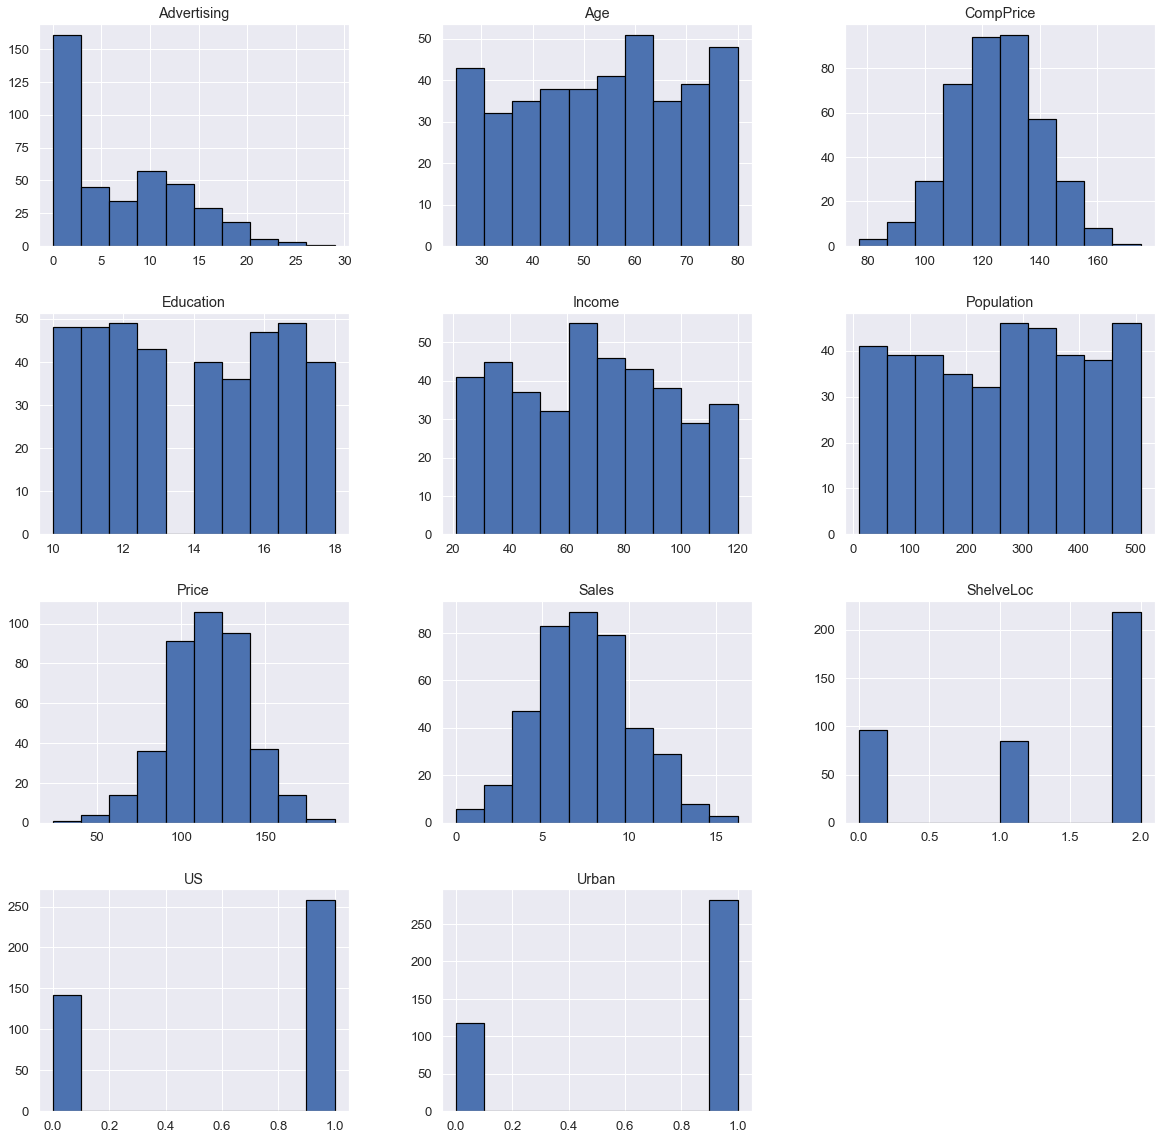

In [187]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

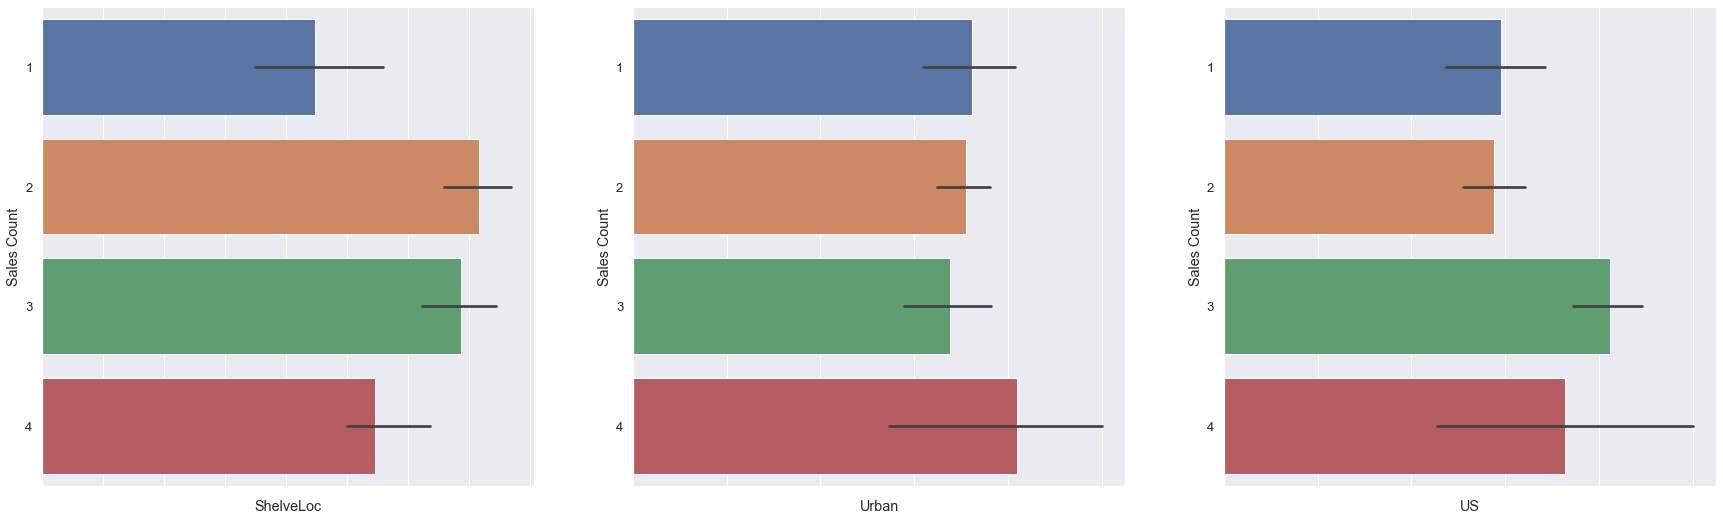

In [188]:
# Plotting how every feature correlate with the "target"
sb.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sb.barplot(x = f"{column}", y = 'SalesCategorical', data = df)
    g.set_xticklabels(g.get_xticklabels(), rotation=180)
    plt.ylabel('Sales Count')
    plt.xlabel(f'{column}')

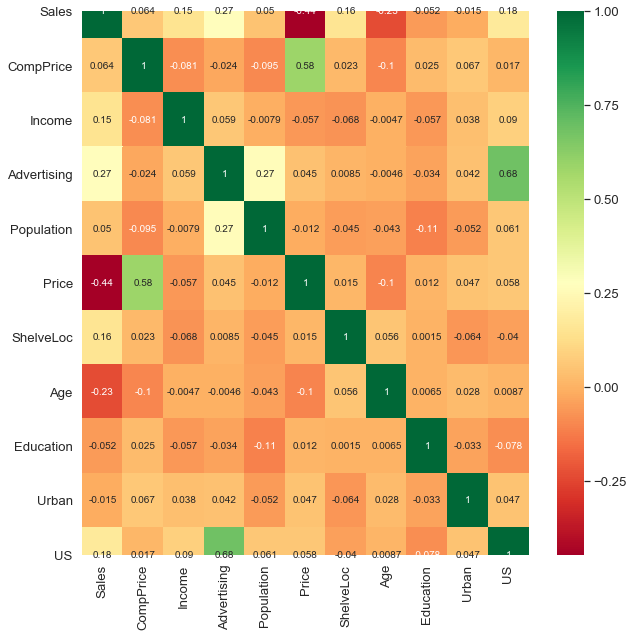

In [189]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [190]:
X = df.drop(columns =['Sales','SalesCategorical'], axis=1)

y = df['SalesCategorical']

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [192]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
190,130,37,13,297,101,2,37,13,0,1
46,127,90,14,16,70,2,48,15,0,1
50,99,32,18,341,108,0,80,16,1,1
377,132,61,0,263,125,2,41,12,0,0
121,125,89,10,380,87,0,28,10,1,1


In [193]:
y_train.head()

190    2
46     3
50     1
377    2
121    3
Name: SalesCategorical, dtype: category
Categories (4, object): [1 < 2 < 3 < 4]

In [194]:
X_test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
248,111,52,0,12,101,2,61,11,1,1
318,116,72,10,456,130,1,41,14,0,1
173,135,91,5,207,128,2,66,18,1,1
285,146,26,11,261,131,2,39,10,1,1
184,132,33,7,35,97,2,60,11,0,1


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales               400 non-null float64
CompPrice           400 non-null int64
Income              400 non-null int64
Advertising         400 non-null int64
Population          400 non-null int64
Price               400 non-null int64
ShelveLoc           400 non-null int32
Age                 400 non-null int64
Education           400 non-null int64
Urban               400 non-null int32
US                  400 non-null int32
SalesCategorical    399 non-null category
dtypes: category(1), float64(1), int32(3), int64(7)
memory usage: 30.4 KB


In [196]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [197]:
pred_val = model.predict(X_test)
pd.Series(pred_val).value_counts()
pd.crosstab(y_test,pred_val)

col_0,1,2,3,4
SalesCategorical,,,,
1,8,6,1,0
2,9,22,13,0
3,0,7,11,1
4,0,0,1,0


In [198]:
y_predict = model.predict(X_test)

In [199]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual': y_test,
                                'Prediction': y_predict})
actual_vs_predict.sample(10)

,Actual,Prediction
201,2,1
56,3,3
96,3,3
124,2,2
169,3,3
314,2,3
369,3,2
393,2,2
75,2,3
347,2,2


In [200]:
from sklearn import tree

[Text(105.9595025510204, 209.6742857142857, 'X[5] <= 0.5\nentropy = 1.608\nsamples = 320\nvalue = [61, 166, 83, 10]'),
 Text(37.57959183673469, 194.14285714285714, 'X[4] <= 102.5\nentropy = 1.351\nsamples = 76\nvalue = [35, 34, 7, 0]'),
 Text(13.66530612244898, 178.61142857142858, 'X[6] <= 41.5\nentropy = 1.264\nsamples = 23\nvalue = [3, 15, 5, 0]'),
 Text(6.83265306122449, 163.07999999999998, 'X[3] <= 128.0\nentropy = 0.722\nsamples = 5\nvalue = [0, 1, 4, 0]'),
 Text(3.416326530612245, 147.54857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(10.248979591836735, 147.54857142857142, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(20.49795918367347, 163.07999999999998, 'X[3] <= 69.0\nentropy = 0.944\nsamples = 18\nvalue = [3, 14, 1, 0]'),
 Text(17.081632653061224, 147.54857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(23.914285714285715, 147.54857142857142, 'X[1] <= 54.0\nentropy = 0.672\nsamples = 17\nvalue = [3, 14, 0, 0]'),
 Tex

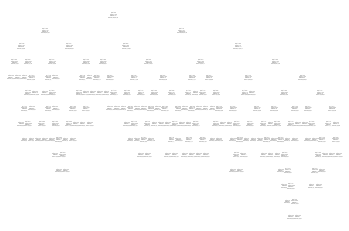

In [201]:
tree.plot_tree(model) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

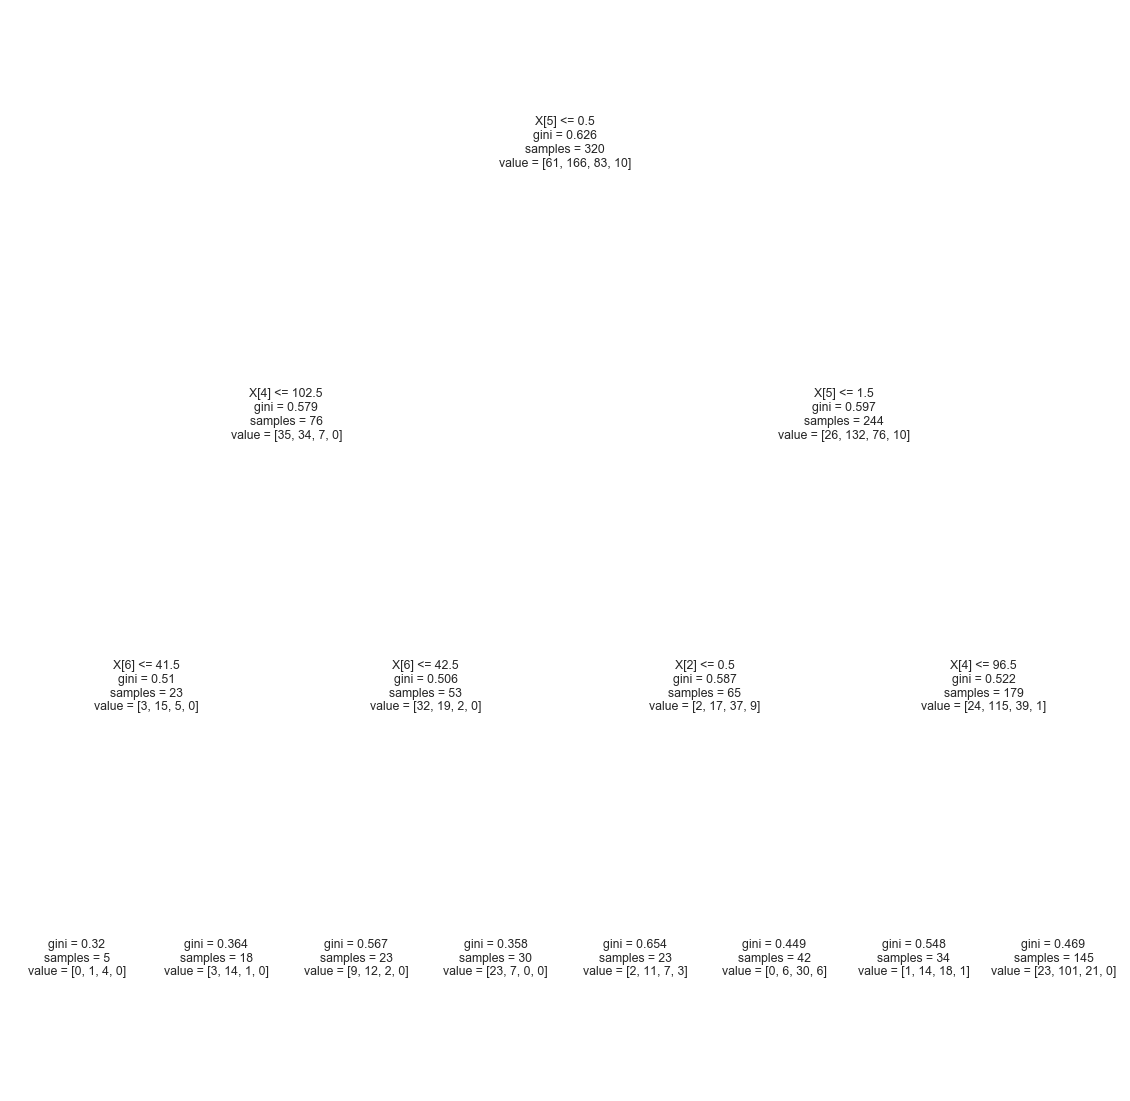

In [202]:
#with gini index

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
plt.figure(figsize=(20,20))
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5) 
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
tree = DecisionTreeClassifier(random_state=100)
tree.fit(X_train, y_train)